In [1]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

## Simple Line Chart

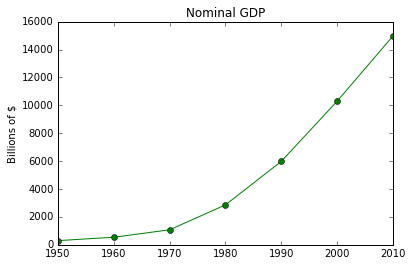

In [5]:
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

# create a line chart, years on x-axis, gdp on y-axis
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')

# add a title
plt.title("Nominal GDP")

# add a label to the y-axis
plt.ylabel("Billions of $")
plt.show()

## Simple Bar Chart

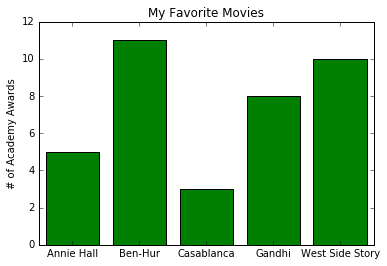

In [7]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

# bars are by default width 0.8, so we'll add 0.1 to the left coordinates
# so that each bar is centered
xs = [i + 0.1 for i, _ in enumerate(movies)]

# plot bars with left x-coordinates [xs], heights [num_oscars]
plt.bar(xs, num_oscars,color='green')

plt.ylabel("# of Academy Awards")
plt.title("My Favorite Movies")

# label x-axis with movie names at bar centers
plt.xticks([i + 0.5 for i, _ in enumerate(movies)], movies)

plt.show()

## Histogram

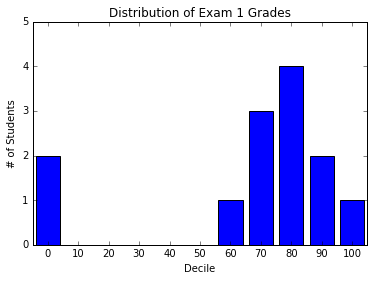

In [8]:
from collections import Counter
grades = [83,95,91,87,70,0,85,82,100,67,73,77,0]
decile = lambda grade: grade // 10 * 10
histogram = Counter(decile(grade) for grade in grades)

plt.bar([x - 4 for x in histogram.keys()], # shift each bar to the left by 4
        histogram.values(),                # give each bar its correct height
        8)                                 # give each bar a width of 8

plt.axis([-5, 105, 0, 5])                  # x-axis from -5 to 105,
                                           # y-axis from 0 to 5

plt.xticks([10 * i for i in range(11)])    # x-axis labels at 0, 10, ..., 100
plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam 1 Grades")
plt.show()

## Simple Bar Chart

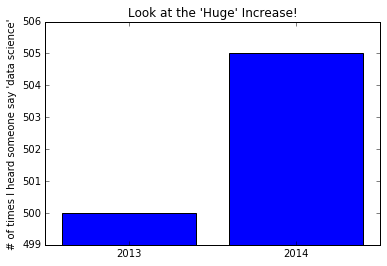

In [9]:
mentions = [500, 505]
years = [2013, 2014]

plt.bar([2012.6, 2013.6], mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")

# if you don't do this, matplotlib will label the x-axis 0, 1
# and then add a +2.013e3 off in the corner (bad matplotlib!)
plt.ticklabel_format(useOffset=False)

# misleading y-axis only shows the part above 500
plt.axis([2012.5,2014.5,499,506])
plt.title("Look at the 'Huge' Increase!")
plt.show()

## Line Chart

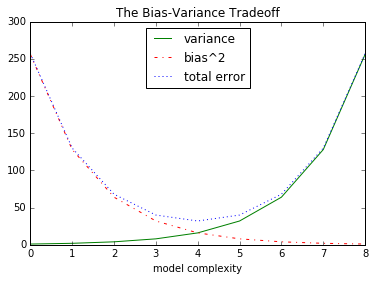

In [10]:
variance     = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error  = [x + y for x, y in zip(variance, bias_squared)]
xs = [i for i, _ in enumerate(variance)]

# we can make multiple calls to plt.plot
# to show multiple series on the same chart
plt.plot(xs, variance,     'g-',  label='variance')    # green solid line
plt.plot(xs, bias_squared, 'r-.', label='bias^2')      # red dot-dashed line
plt.plot(xs, total_error,  'b:',  label='total error') # blue dotted line

# because we've assigned labels to each series
# we can get a legend for free
# loc=9 means "top center"
plt.legend(loc=9)
plt.xlabel("model complexity")
plt.title("The Bias-Variance Tradeoff")
plt.show()

## Scatter Plot

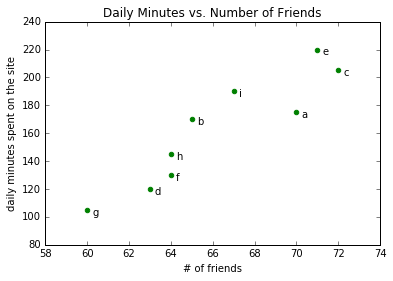

In [12]:
friends = [ 70,  65,  72,  63,  71,  64,  60,  64,  67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels =  ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

plt.scatter(friends, minutes,color='green')

# label each point
for label, friend_count, minute_count in zip(labels, friends, minutes):
    plt.annotate(label,
        xy=(friend_count, minute_count), # put the label with its point
        xytext=(5, -5),                  # but slightly offset
        textcoords='offset points')

plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.show()


In [14]:
import random

In [15]:
xs = [random.randint(1,100) for x in range(1000)]

In [17]:
from collections import Counter


In [20]:
y =Counter(xs)

In [23]:
xdata = y.keys()

In [24]:
ydata = y.values()

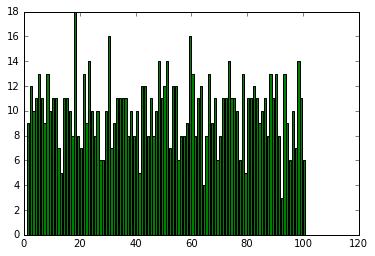

In [26]:
plt.bar(xdata,ydata,color = 'green')
plt.show()

## Normal Distribution 

In [30]:
import math

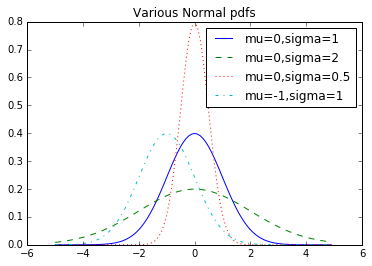

In [31]:

def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1)   for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend()
plt.title("Various Normal pdfs")
plt.show()

## Normal CDF

In [32]:
def normal_cdf(x, mu=0,sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

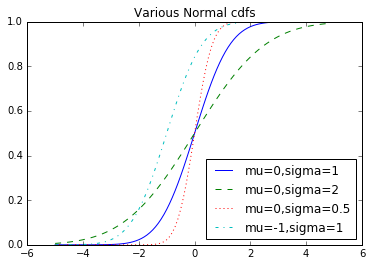

In [33]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend(loc=4) # bottom right
plt.title("Various Normal cdfs")
plt.show()

## from P to X

In [34]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """find approximate inverse using binary search"""

    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)

    low_z = -10.0                      # normal_cdf(-10) is (very close to) 0
    hi_z  =  10.0                      # normal_cdf(10)  is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2     # consider the midpoint
        mid_p = normal_cdf(mid_z)      # and the cdf's value there
        if mid_p < p:
            # midpoint is still too low, search above it
            low_z = mid_z
        elif mid_p > p:
            # midpoint is still too high, search below it
            hi_z = mid_z
        else:
            break

    return mid_z

## bernulli and binormial

In [65]:
from __future__ import division## reserve floating number
def bernoulli_trial(p):
    return 1 if random.random() < p else 0

def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))


In [66]:
def make_hist(p, n, num_points):

    data = [binomial(n, p) for _ in range(num_points)]

    # use a bar chart to show the actual binomial samples
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color='0.75')

    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))

    # use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
          for i in xs]
    plt.plot(xs,ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.show()

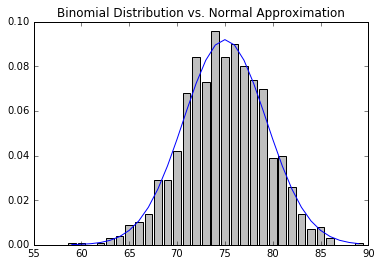

In [67]:
make_hist(0.75, 100, 1000)